In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import zscore

In [2]:
# Read in the dataset on which the INFERENCE is happening
adata = sc.read_visium("/data/leslie/preethi/spaceranger/RA_data/RA379A/outs/")
adata.var_names_make_unique()
adata

/home/periyakp/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 3660 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [3]:
RA379A_infer_array = np.load("./RA379A_infer_alpha10_K14.npy")
RA379A_infer_topics = pd.DataFrame(RA379A_infer_array, columns = [str(i + 1) for i in range(len(RA379A_infer_array[0]))], index=adata.obs.index)


# NEED TO DIVIDE BY THE ROW SUM (want to get the relative relevance of each topic for each
# spot, do this for each row to normalize)
RA379A_infer_topics_norm = RA379A_infer_topics.div(RA379A_infer_topics.sum(axis=1), axis=0)

df_with_topics = adata.obs.join(RA379A_infer_topics_norm)
adata.obs = df_with_topics

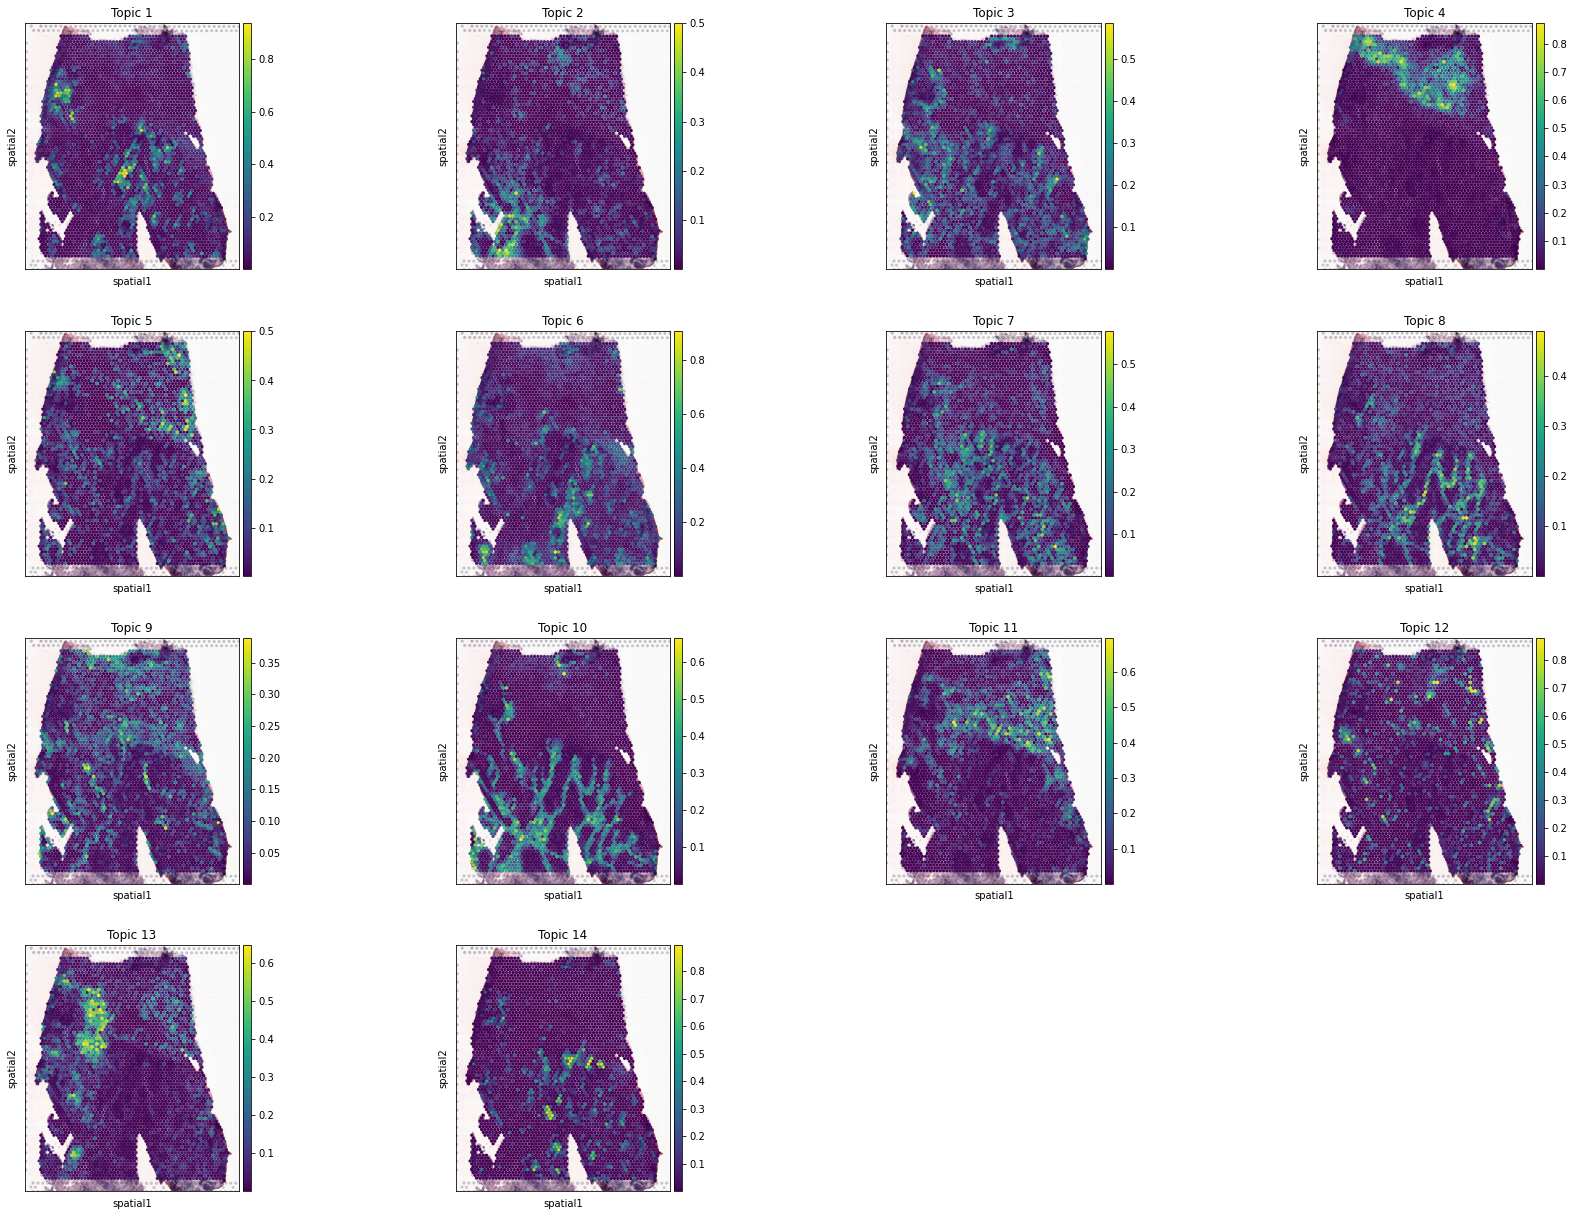

In [4]:
adata.obsm['spatial'] = adata.obsm['spatial'].astype('float')
sc.pl.spatial(adata, img_key="hires", color=[topic for topic in RA379A_infer_topics_norm.columns], size=1.5, title=["Topic "+ topic for topic in RA379A_infer_topics_norm.columns])